<h1><center>GLM Site 15</center></h1>



### Import all the packages that we need 

In [19]:
options(warn = -1)
library(caret)
library(dplyr)
library(corrplot)
library(DMwR)
library(unbalanced)
library(ROCR)
library(pROC)
library(boot)

### Set working directory and load data

In [20]:
setwd("/Users/sunmengnan/Documents/Github2/thgfd/data/stratified")
glm_data <- read.csv("dataset_15.csv")
glm_data$fraud_status <- as.factor((glm_data$fraud_status))
glm_data <- select(glm_data, -Site_Key, -Ordered_Product_Key)
head(glm_data)

Category_Level_2Accessories,Category_Level_2Bags,Category_Level_2Beauty.Boxes,Category_Level_2Body.Care,Category_Level_2Books,Category_Level_2Clothing,Category_Level_2DVD.and.Blu.Ray,Category_Level_2Footwear,Category_Level_2Fragrance,Category_Level_2Games,⋯,num_valid,count,prop,customer_status,canc_prop,ship_status,fraud_status,destination_int,priority_int,occupation_int
0,0,0,0,0,0,0,0,0,0,⋯,4,4,1,2,0,1,0,1,1,1
0,0,0,0,0,0,0,0,0,0,⋯,4,4,1,2,0,1,0,1,1,1
0,0,0,0,0,0,0,0,0,0,⋯,21,21,1,2,0,2,0,1,1,1
0,0,0,0,0,0,0,0,0,0,⋯,21,21,1,2,0,2,0,1,1,1
0,0,0,0,0,0,0,0,0,0,⋯,21,21,1,2,0,2,0,1,1,1
0,0,0,0,0,0,0,0,0,0,⋯,5,5,1,2,0,1,0,1,1,1


### Show the fraud status table

In [5]:
table(glm_data$fraud_status)


    0     1 
63387   166 

### Firstly, in the data cleaning process, use the Tlink to find the nearest point between fraud and non-fraud instance, which should be considered as noise and remove these data, show the sum of fraud counts, the number decreases

In [21]:
set.seed(123)
Tomek <- ubTomek(select(glm_data, -fraud_status), glm_data$fraud_status, verbose = TRUE)
glm_data <- cbind(Tomek$X, Tomek$Y)
glm_data <- rename(glm_data, fraud_status = "Tomek$Y")
head(glm_data)
table(glm_data$fraud_status)

Instances removed 88 : 0.14 % of 0 class ; 0.14 % of training ; Time needed 0.68 


Category_Level_2Accessories,Category_Level_2Bags,Category_Level_2Beauty.Boxes,Category_Level_2Body.Care,Category_Level_2Books,Category_Level_2Clothing,Category_Level_2DVD.and.Blu.Ray,Category_Level_2Footwear,Category_Level_2Fragrance,Category_Level_2Games,⋯,num_valid,count,prop,customer_status,canc_prop,ship_status,destination_int,priority_int,occupation_int,fraud_status
0,0,0,0,0,0,0,0,0,0,⋯,4,4,1,2,0,1,1,1,1,0
0,0,0,0,0,0,0,0,0,0,⋯,4,4,1,2,0,1,1,1,1,0
0,0,0,0,0,0,0,0,0,0,⋯,21,21,1,2,0,2,1,1,1,0
0,0,0,0,0,0,0,0,0,0,⋯,21,21,1,2,0,2,1,1,1,0
0,0,0,0,0,0,0,0,0,0,⋯,21,21,1,2,0,2,1,1,1,0
0,0,0,0,0,0,0,0,0,0,⋯,5,5,1,2,0,1,1,1,1,0



    0     1 
63299   166 

### select the data that we want to turn into factor type, turn all the variable type into factor, keep the factor which has more than two factor levels, then combine them together again

In [22]:
temp <- select(glm_data, -prop, -canc_prop, -Product_Charge_Price, -num_valid, 
               -count, -Order_Sequence_No, -Ordered_Qty, -Cancelled_Qty)
temp[,(1:ncol(temp))] <- lapply(temp[,(1:ncol(temp))],as.factor)
temp <- temp[, sapply(temp, nlevels) > 1]
nums <- select(glm_data, prop, canc_prop, Product_Charge_Price, num_valid, 
               count, Order_Sequence_No, Ordered_Qty, Cancelled_Qty)
glm_data <- cbind(temp, nums)

### Omitting some conlumns which we do not need and view that top rows of the data 

In [23]:
glm_data <- select(glm_data, -Campaign_Key, -Delivery_Option_Type_Key, -Payment_Method_Key,
                   -Medium_Key, -pay_key_num, -Payment_Provider_Key, 
                   -Order_Payment_Status_Key, -occupation_int,
                   -canc_prop, -Ordered_Qty, -priority_int, -Cancelled_Qty, -prop,
                   -Order_Sequence_No, -count)


###  Check the value of each variable

In [29]:
for (i in 1:17){
  print(colnames(glm_data[i]))
  print(table(glm_data[,i]))
}

[1] "Category_Level_2Beauty.Boxes"

    0     1 
63438    27 
[1] "Category_Level_2Body.Care"

    0     1 
51945 11520 
[1] "Category_Level_2Books"

    0     1 
63268   197 
[1] "Category_Level_2Fragrance"

    0     1 
63160   305 
[1] "Category_Level_2Gifts"

    0     1 
63441    24 
[1] "Category_Level_2Hair.Care"

    0     1 
57196  6269 
[1] "Category_Level_2Health.and.Beauty.Electricals"

    0     1 
62767   698 
[1] "Category_Level_2Health.and.Beauty.Gift.Sets"

    0     1 
62636   829 
[1] "Category_Level_2Homeware"

    0     1 
63462     3 
[1] "Category_Level_2Make.Up"

    0     1 
59182  4283 
[1] "Category_Level_2Nail.Care"

    0     1 
62965   500 
[1] "Category_Level_2Shaving"

    0     1 
63410    55 
[1] "Category_Level_2Skin.Care"

    0     1 
27349 36116 
[1] "Category_Level_2Sports.Nutrition"

    0     1 
63318   147 
[1] "customer_status"

    1     2     3     4 
  257 62561   133   514 
[1] "ship_status"

    1     2 
56345  7120 
[1] "destination_int"

### Delete the variables which are not important in the matrix

In [33]:
glm_data <- select(glm_data,-Category_Level_2Beauty.Boxes,
                   -Category_Level_2Books,-Category_Level_2Gifts,
                   -Category_Level_2Health.and.Beauty.Gift.Sets, -Category_Level_2Homeware,
                   -Category_Level_2Nail.Care, -Category_Level_2Shaving, 
                   -Category_Level_2Sports.Nutrition, -Category_Level_2Fragrance,
                   -Category_Level_2Hair.Care)

new_data <- glm_data
head(new_data)


Category_Level_2Body.Care,Category_Level_2Health.and.Beauty.Electricals,Category_Level_2Make.Up,Category_Level_2Skin.Care,customer_status,ship_status,destination_int,fraud_status,Product_Charge_Price,num_valid
0,0,0,1,2,1,1,0,0.0,4
0,0,0,1,2,1,1,0,35.0,4
0,0,0,1,2,2,1,0,0.0,21
0,0,0,1,2,2,1,0,22.4,21
0,0,0,1,2,2,1,0,36.0,21
0,0,0,1,2,1,1,0,0.0,5


### Create a partition to seperate the data into training part and test part



In [34]:
set.seed(123)
index <- createDataPartition(glm_data$fraud_status, p = 0.7, list = FALSE)
train <- new_data[index, ]
test <- new_data[-index, ]

### Train our model using SOMTE, in each iteration, samples one minority class element , then one of its nearest neighbors. Both points are now interpolated / convex-combined, resulting in a new virtual data point for the minority class, we compare the two tables before and after SOMTE, we can see that the fraud transaction times enlarge by 10 times

In [35]:
set.seed(123)
train <- SMOTE(fraud_status ~., new_data, perc.over = 1000, perc.under = 150)
table(new_data$fraud_status)
prop.table(table(new_data$fraud_status))
table(train$fraud_status)
prop.table(table(train$fraud_status))


    0     1 
63299   166 


          0           1 
0.997384385 0.002615615 


   0    1 
2490 1826 


        0         1 
0.5769231 0.4230769 

### Bulid a GLM model, using binomial logit link function, and also calculate the running time

In [36]:

start <- Sys.time()
model <- glm(fraud_status ~., data = train, family = binomial(link = "logit"))
end <- Sys.time()
time <- end - start
time
summary(model)


Time difference of 0.06852603 secs


Call:
glm(formula = fraud_status ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6611  -0.6677  -0.4705   0.4339   2.2767  

Coefficients:
                                                Estimate Std. Error z value
(Intercept)                                     3.062728   0.356002   8.603
Category_Level_2Body.Care1                     -0.057923   0.118804  -0.488
Category_Level_2Health.and.Beauty.Electricals1  2.536183   0.212041  11.961
Category_Level_2Make.Up1                        0.691445   0.142416   4.855
Category_Level_2Skin.Care1                     -0.667680   0.094809  -7.042
customer_status2                               -4.242317   0.346774 -12.234
customer_status3                               -1.773744   0.540837  -3.280
customer_status4                               -0.592404   0.415968  -1.424
ship_status2                                    1.805908   0.101192  17.846
destination_int2  

### Use our model to test our test data set, calculate the curve area value



[1] 0.8038725

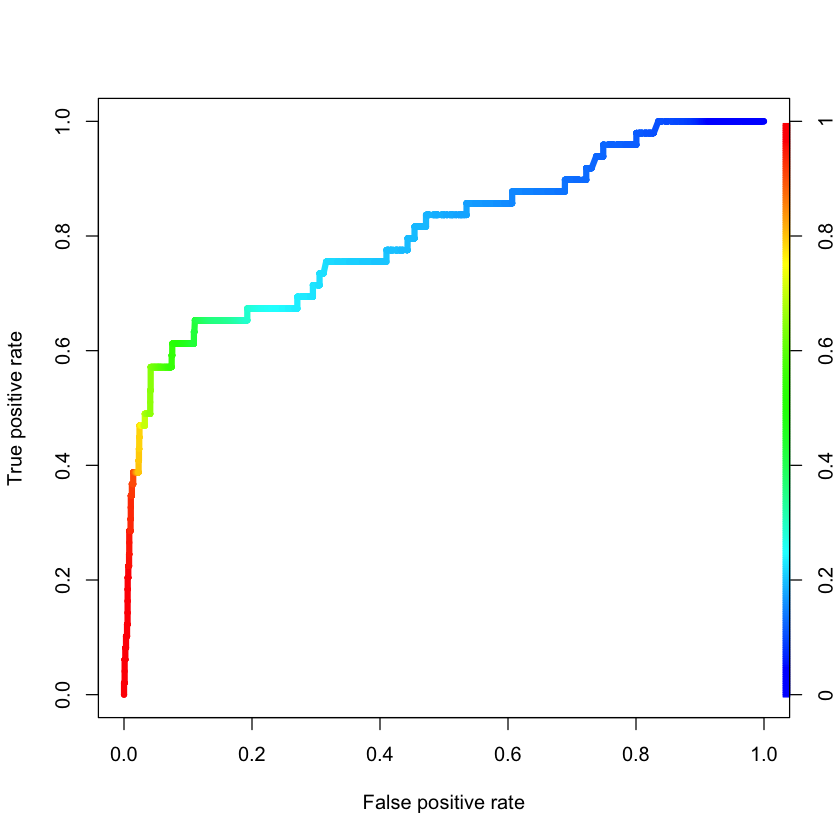

In [37]:
model_predict <- predict(model, test, type = "response")
ROC_predict <- prediction(model_predict, test$fraud_status)
ROC_performance <- performance(ROC_predict, "tpr", "fpr")
plot(ROC_performance, colorize = TRUE, text.adj = c(-0.2,1.7), lwd = 5)
area_under_curve <- performance(ROC_predict, measure = "auc")
area_under_curve@y.values[[1]]

### Set training control parameter with 10 folder corss varidation and use this model to predict the fraud status, ouput  the confusion matrix as well

In [38]:
ctrl <- trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE)
model_fit <- caret::train(fraud_status ~ Category_Level_2Skin.Care + Category_Level_2Make.Up +
                            Category_Level_2Health.and.Beauty.Electricals + 
                            customer_status + Category_Level_2Body.Care +
                            ship_status + destination_int + Product_Charge_Price + num_valid,
                   data = train, method = "glm", family = binomial(link ="logit"),
                   trControl = ctrl, tuneLength = 10)
pred <- predict(model_fit, newdata = test)
conf <- confusionMatrix(data = pred, test$fraud_status)
conf
conf$byClass


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 17349    19
         1  1640    30
                                          
               Accuracy : 0.9129          
                 95% CI : (0.9088, 0.9168)
    No Information Rate : 0.9974          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0301          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.91363         
            Specificity : 0.61224         
         Pos Pred Value : 0.99891         
         Neg Pred Value : 0.01796         
             Prevalence : 0.99743         
         Detection Rate : 0.91128         
   Detection Prevalence : 0.91228         
      Balanced Accuracy : 0.76294         
                                          
       'Positive' Class : 0               
                                          

Sensitivity          Specificity       Pos Pred Value 
          0.91363421           0.61224490           0.99890603 
      Neg Pred Value            Precision               Recall 
          0.01796407           0.99890603           0.91363421 
                  F1           Prevalence       Detection Rate 
          0.95436917           0.99742620           0.91128270 
Detection Prevalence    Balanced Accuracy 
          0.91228070           0.76293955